In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib widget

### Argument list and corresponding values of functions $x \rightarrow x^2$ and $x \rightarrow \sin(x)$
Let's try to calculate the gradient of the function with values given.

In [3]:
# argument data
lbound, rbound, num = -2, 2, 7
arg_pts = np.linspace(lbound, rbound, num=num)

In [68]:
# gradients for x**2:
pow2_pts = np.power(arg_pts, 2)

pow2_num_grad = np.gradient(pow2_pts,arg_pts)
pow2_tru_grad = 2*arg_pts

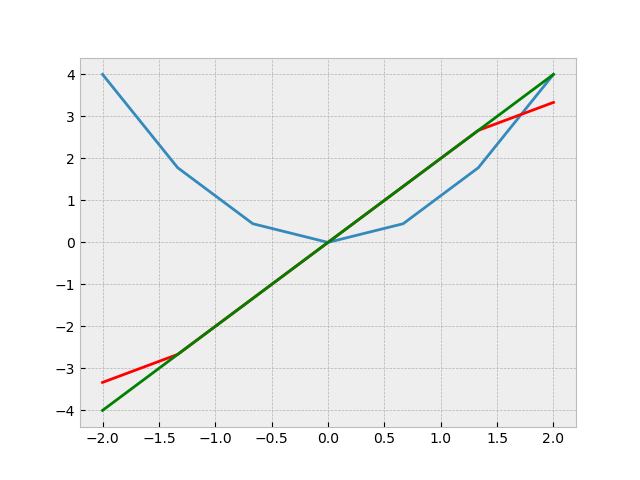

In [69]:
fig, ax = plt.subplots()
ax.plot(arg_pts,pow2_pts)
ax.plot(arg_pts,pow2_num_grad,c="r")
ax.plot(arg_pts,pow2_tru_grad,c="g")
plt.show()

In [70]:
# gradients for sin(x):
sin_pts = np.sin(arg_pts)

sin_num_grad = np.gradient(sin_pts, arg_pts)
sin_tru_grad = np.cos(arg_pts)

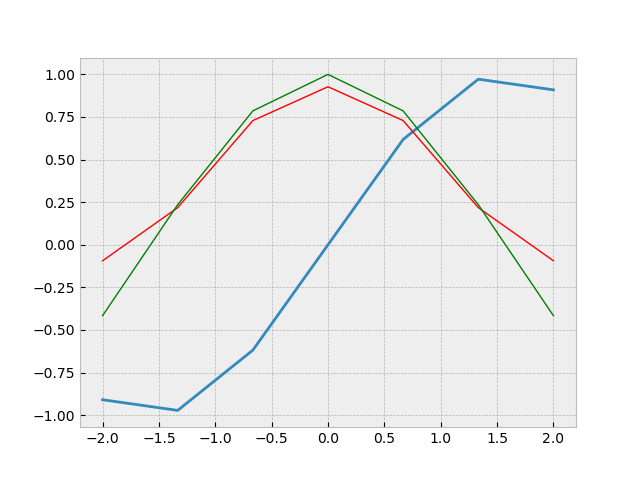

In [71]:
fig2, ax2 = plt.subplots()
ax2.plot(arg_pts, sin_pts)
ax2.plot(arg_pts,sin_num_grad,c="r",lw=1)
ax2.plot(arg_pts,sin_tru_grad,c="g",lw=1)
plt.show()

### Endpoints
Notice the difference on the edge of the definition, there is a remedy for that, namely additional argument edge_order=2 which\
causes np.gradient to use higier order aproximation and for the above functions it removes outliers at the edges.

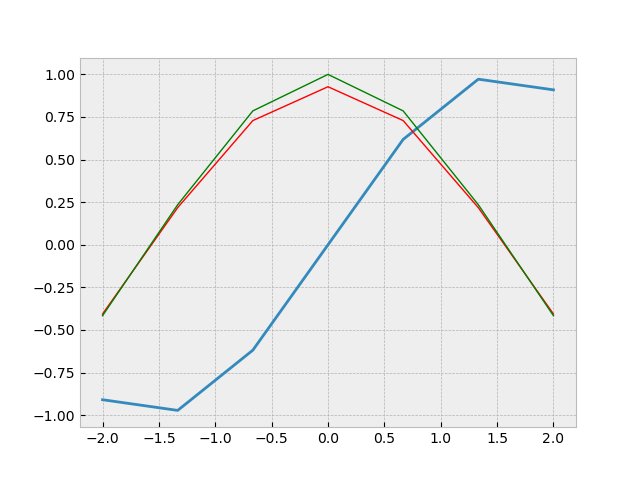

In [72]:
# compare with edge_order=2
sin_pts = np.sin(arg_pts)

sin2_num_grad = np.gradient(sin_pts, arg_pts, edge_order=2)
sin2_tru_grad = np.cos(arg_pts)

fig3, ax3 = plt.subplots()
ax3.plot(arg_pts, sin_pts)
ax3.plot(arg_pts,sin2_num_grad,c="r",lw=1)
ax3.plot(arg_pts,sin2_tru_grad,c="g",lw=1)
plt.show()

### More dimensions in the argument
let's calculate the gradient of a function $$(x,y)\quad\longrightarrow\quad -\frac{x^2}{4}-\frac{y^2}{4}$$

#### Evenly spaced points

In [109]:
# argument data 2D
x_lbound, x_rbound, x_num = -3, 2, 6
y_lbound, y_rbound, y_num = -3, 2, 6
pts_dist = np.abs(x_rbound - x_lbound)/(x_num-1)

x_arg_pts = np.linspace(x_lbound, x_rbound, x_num)
y_arg_pts = np.linspace(y_lbound, y_rbound, y_num)

x_s, y_s = np.meshgrid(x_arg_pts, y_arg_pts)

In [110]:
poly1_val = - (x_s**2)/4 - (y_s**2)/4
#x_s, y_s
poly1_true_grad_x, poly1_true_grad_y = - (x_s)/2, - (y_s)/2
poly1_num_grad = np.gradient(poly1_val, pts_dist, edge_order=2)

print(f"tru grad_y =\n{poly1_true_grad_y},\n tru grad_x = \n{poly1_true_grad_x}")
print(f"num grad_y =\n{poly1_num_grad[0]},\n num_grad_x \n{poly1_num_grad[1]}")

tru grad_y =
[[ 1.5  1.5  1.5  1.5  1.5  1.5]
 [ 1.   1.   1.   1.   1.   1. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]
 [-0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]],
 tru grad_x = 
[[ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]]
num grad_y =
[[ 1.5  1.5  1.5  1.5  1.5  1.5]
 [ 1.   1.   1.   1.   1.   1. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]],
 num_grad_x 
[[ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]]


#### For grid that is non-uniform but grid-preserving
We have to feed np.gradient with lists of points that created the data,\
chcek varargs parameter in numpy reference [np.grad](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)

In [142]:
poly1_num_grad = np.gradient(poly1_val, x_arg_pts, y_arg_pts, edge_order=2)
poly1_num_grad 

[array([[ 1.5,  1.5,  1.5,  1.5,  1.5,  1.5],
        [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [-1. , -1. , -1. , -1. , -1. , -1. ]]),
 array([[ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
        [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
        [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
        [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
        [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
        [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ]])]

#### Exercise: Calculate gradient of a function given at random sample points (no grid structure of arguments).
This is true exercise, i dont know the answer, some ideas(or misleading ideas):
1) gridization (minimal grid that contain the sample) of a random sample with some aproximation of\
    points in between (seems hard if for example our random sample is set of points on a circle,\
    we only have values on the circle but we have to fill the disk, some sort of interpolation )
2) triangulation of a sample and take some meaningful minimal grid.

### Linear regression
Start with set of points with random "noise"

In [5]:
import numpy as np
rng = np.random.default_rng(12345)

import matplotlib.pyplot as plt

# # basic definitions and constant setup
def line(a,x):
    return a*x

num = 100
standard_deviation = 5
min_slope, max_slope = -10, 10
lbound, rbound = -11, 12

In [44]:
# # data generation
slope = min_slope + (max_slope - min_slope) * rng.random() # random slope
x = lbound + (rbound - lbound) * rng.random(num)           # random first coordinate
noise = standard_deviation * rng.standard_normal(num)      # the noise

# # putting *line with *noise together
arr = np.stack((x, noise), axis=0).T
pts = np.apply_along_axis(lambda pt : np.array([pt[0], line(slope, pt[0]) + pt[1]]), axis=1, arr=arr)

slope = 5.384008489634645


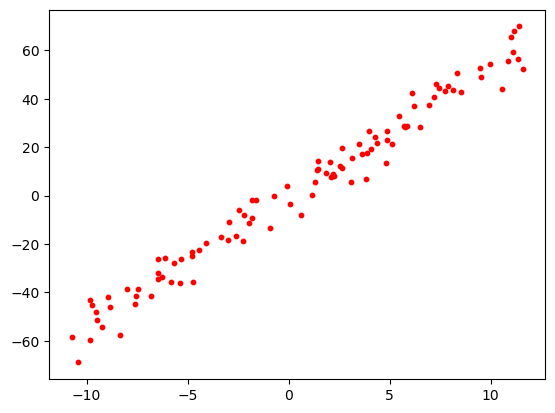

In [47]:
print(f'slope = {slope}')
plt.scatter(*pts.T, s=10, c='red')
plt.show()

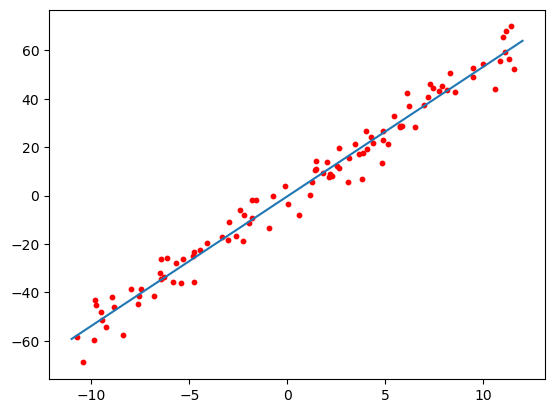

In [60]:
# linear regression with numpy (check also np.linalg.lstsq)
m,b = np.polyfit(pts.T[0], pts.T[1], 1)

x = np.linspace(lbound, rbound, 10)
y = m*x+b

plt.plot(x,y)
plt.scatter(*pts.T, s=10, c='red')
plt.show()

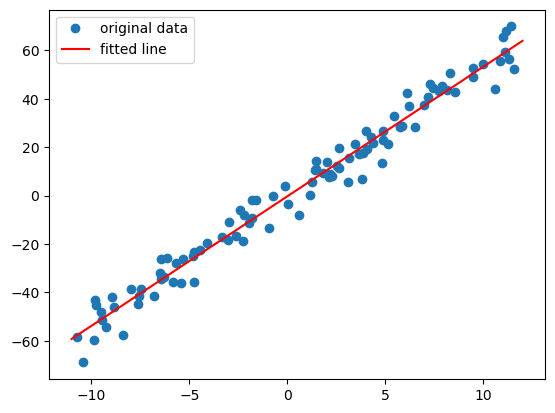

In [85]:
# linear regression with scipy

if 'x' in globals(): del x
if 'y' in globals(): del y
from scipy import stats

res = stats.linregress(pts.T[0], pts.T[1])

x = np.linspace(lbound, rbound, 10)
plt.plot(*pts.T, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()

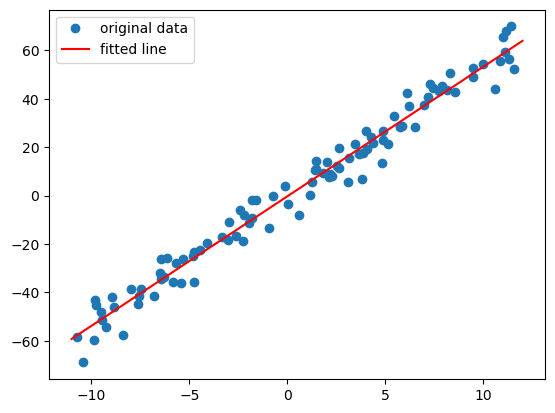

In [107]:
# linear regression ML sklearn 
from sklearn.linear_model import LinearRegression

if 'x' in globals(): del x
if 'y' in globals(): del y

reg = LinearRegression()       # this is our black-box 

""" We feed black box data about x and y coordiinates 
    LinearRegression do not accept 1-dim arrays therefore *.reshape(-1,1) """
reg.fit( pts.T[0].reshape(-1,1), pts.T[1].reshape(-1,1) ) 

x = np.linspace(lbound, rbound, 10).reshape(-1,1)
y = reg.predict(x)            # here we USE the model reg

plt.plot(*pts.T, 'o', label='original data')
plt.plot(x, y, 'r', label='fitted line')
plt.legend()

# # What is going on outside lbound, rbound:
# x_out = np.linspace(lbound-50, rbound+50, 10).reshape(-1,1)
# y_out = reg.predict(x_out)
# plt.plot(x_out, y_out, 'r')
# plt.show()

### Polynomial Regression
Packages numpy, scipy and sklearn provide functions to approximate data with polynomial functions.

In [36]:
# First we need to generate polynmial data (check np.polyval )
if 'x' in globals(): del x
if 'y' in globals(): del y

num, standard_deviation = 100, 20
p = np.array([.2, -2,-4, .1]) # polynomial coefficients

x = lbound + (rbound - lbound) * rng.random(num)
y = np.polyval(p, x) + standard_deviation * rng.standard_normal(num) 

# fig, ax = plt.subplots()
# ax.plot(x,y, 'o', label='original data')
# plt.show()

#### In scipy

In [56]:
# in scipy there is module called: Orthogonal distance regression 
from scipy import odr

# creating a model
poly_model = odr.polynomial(order=3)

# feed our point into the model
data = odr.Data(x, y) # check: data.__dict__

```poly_model``` is out particaluar model we gonna train,\
```data``` is data prepared by scipy to feed models.\
The traning is performed by executing .run on a [function called ODR](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.html#scipy.odr.ODR) which gather the model and the data.

In [57]:
odr_obj = odr.ODR(data, poly_model) # ODR pair data and model
output = odr_obj.run() # here traning is performed

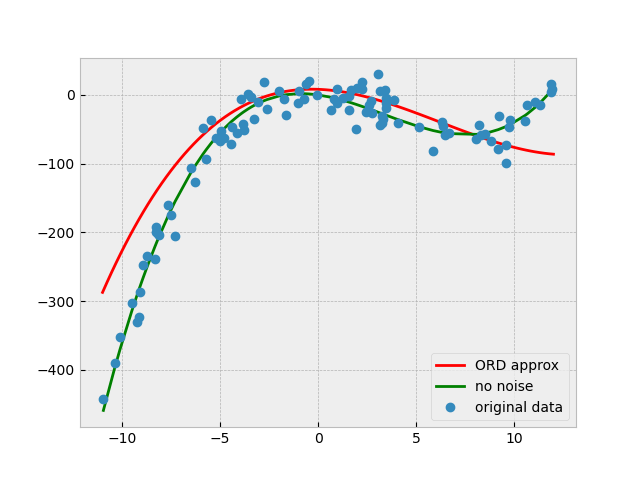

In [65]:
poly_coeff = output.beta[::-1] # [::-1] is axis=0 backwards, since slicing works like this [start:stop:step]

x_even_pts = np.linspace(lbound, rbound, 100)
y_scipy_val = np.polyval(poly_coeff, x_even_pts)

fig, ax = plt.subplots()
ax.plot(x_even_pts, y_scipy_val, c="r", label='ORD approx')
ax.plot(np.sort(x), np.polyval(p, np.sort(x)), 'g', label='no noise')
ax.plot(x,y, 'o', label='original data')
plt.legend()
plt.show()
# for ORD fit is quite bad, what is wrong?

#### In sklearn

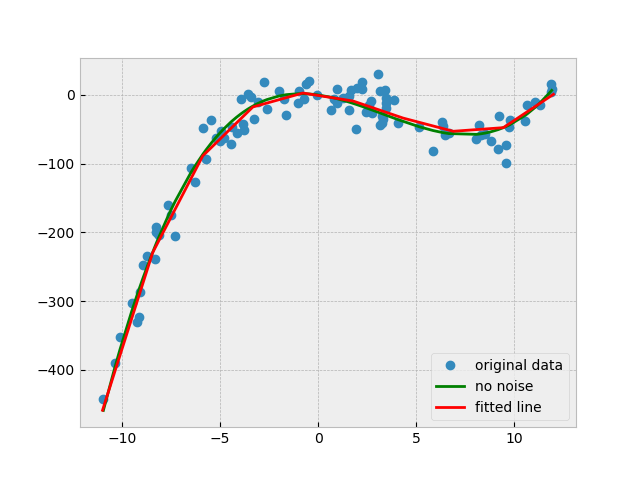

In [60]:
# using sklearn ( below example is taken from https://youtu.be/H8kocPOT5v0 )
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# inform the model that you want polynomial approximation
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1,1)) 

# traning
reg = LinearRegression()
reg.fit( x_poly, y.reshape(-1,1) ) 

# where you want to plot
x_plot = np.linspace(lbound, rbound, 10).reshape(-1,1)

# getting the data from the model
x_plot_poly = poly_features.transform(x_plot)
y_plot_poly = reg.predict(x_plot_poly)

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='original data')
ax.plot(np.sort(x), np.polyval(p, np.sort(x)), 'g', label='no noise')
ax.plot(x_plot, y_plot_poly, 'r', label='fitted line')
plt.legend()
plt.show()

In [158]:
# using scipy

5